In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers


Working on function: Ackley
0.9924734184509671
******
******
Working on function: Bukin
0.981943772144205
******
******
Working on function: Cross in Tray
0.9996452657180117
******
******
Working on function: Drop Wave
0.8764435761426144
******
******
Working on function: Eggholder
0.8735218320759581
******
******
Working on function: Gramacy Lee
1.000003011892283
******
******
Working on function: Holder Table
0.9999765953108293
******
******
Working on function: Schaffer2
0.5787367443191413
******
******
Working on function: Schaffer4
0.6987980232045599
******
******
Working on function: Schwefel
0.9292616569206439
******
******
Working on function: Shubert
0.947572765637561
******
******
Working on function: Bohachevsky
0.9996482454765553
******
******
Working on function: Rotated Hyper Ellipsoid
0.9999468232029212
******
******
Working on function: Sphere
0.9999858152085537
******
******
Working on function: Sum of Different Powers
0.973287399834045
******
******
Working on functio

c:\Users\kutay\OneDrive\Masaüstü\492 taşoda 2\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\utils\models.py:200: RuntimeWarning: invalid value encountered in divide
  predicted_score = (predicted_values - min_predicted_value) / (max_predicted_value - min_predicted_value)
c:\Users\kutay\OneDrive\Masaüstü\492 taşoda 2\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\utils\models.py:200: RuntimeWarning: invalid value encountered in divide
  predicted_score = (predicted_values - min_predicted_value) / (max_predicted_value - min_predicted_value)
c:\Users\kutay\OneDrive\Masaüstü\492 taşoda 2\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\utils\models.py:200: RuntimeWarning: invalid value encountered in divide
  predicted_score = (predicted_values - min_p

0.49997624208154906
******
******
Working on function: Beale
0.999987063325389
******
******
Working on function: Branin
0.9998185688044555
******
******
Working on function: Colville
0.999460837968043
******
******


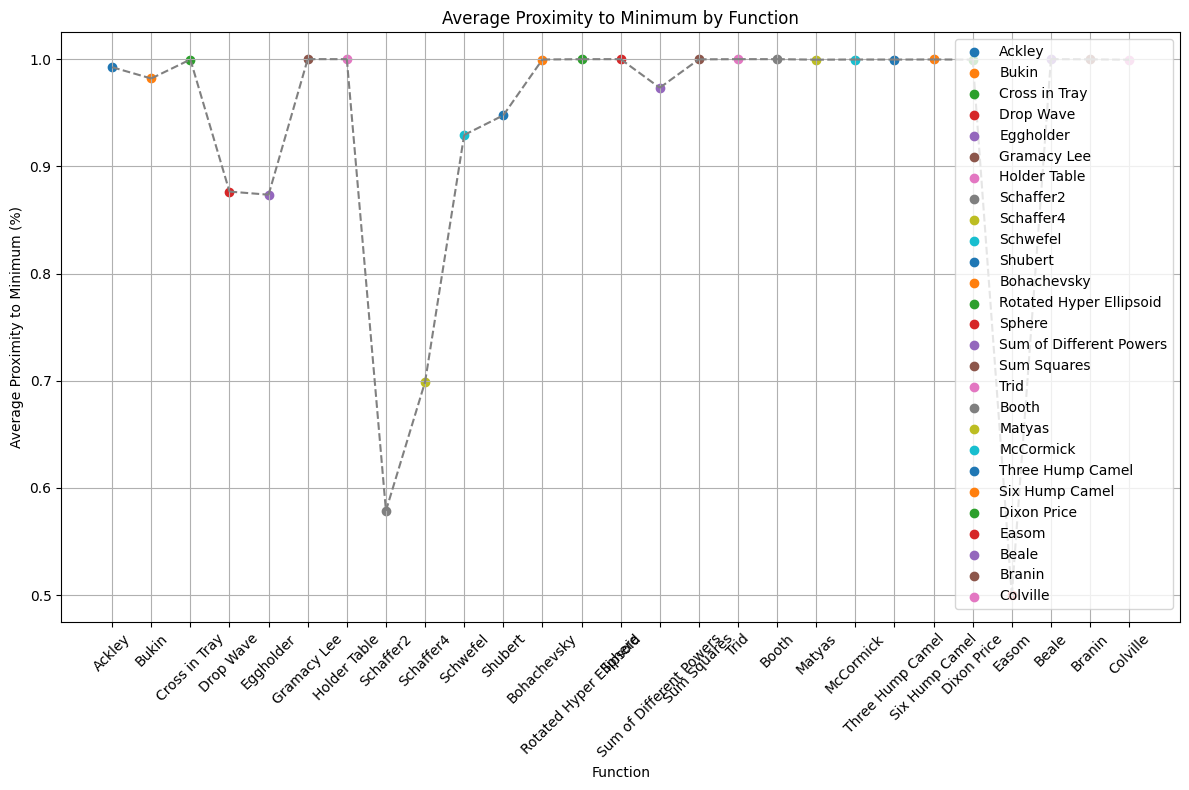

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Initial LHS, Candidate LHS
function_names = ex_func.function_ranges.keys()

# Her bir fonksiyon için işlemleri gerçekleştir
number_of_repeats = 1

average_proximities = {
    "Function": [],
    "Average Proximity to Minimum (%)": []
}

for function_name in function_names:
    if True:
    
        proximity_to_minimum_count = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    print(f"Working on function: {function_name}")

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]


                    # Generate initial samples
                    sampler = samplers.LatinHypercubeSampling(function_param)
                    initial_points = sampler.sample(num_samples=5, ranges=range_param)
                    initial_values = np.array([function_param(i) for i in initial_points])

                    # Train the initial model using random forests
                    rf_model = models.RandomForestModel(n_estimators=200, random_state=1729)
                    rf_model.train_model(initial_points, initial_values)
                    trained_rf_model = rf_model.get_model()

                    # Perform active learning
                    active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
                    min_function_values, improvement, new_points_all, iteration = active_learning.run_active_learning_constant_iterations(2000, range_param, 3)
                    iteration_count += iteration
                    minimum_value_so_far = min(min_function_values)
                    
                    current_proximity =  minimum_value_so_far 
                    proximity_to_minimum_count += current_proximity
                    #print(proximity_to_minimum_count)

                    

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")
                
                    
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

               
        if True:
            average_iterations = iteration_count/number_of_repeats
            current_average_func = ex_func.function_averages[function_name][0]
            current_minimum_func = ex_func.function_mins[function_name][0]
            average_proximity_to_minimum = proximity_to_minimum_count/number_of_repeats
            

            average_proximity_to_minimum_by_percent = (2*(current_average_func-current_minimum_func)-(average_proximity_to_minimum-current_minimum_func))/(2*(current_average_func-current_minimum_func))
            average_proximities["Function"].append(function_name)
            average_proximities["Average Proximity to Minimum (%)"].append(average_proximity_to_minimum_by_percent)
            #print(average_iterations)
            print(average_proximity_to_minimum_by_percent)

            print("******")
            print("******")
            

# Convert the dictionary to a DataFrame
average_proximities_df = pd.DataFrame(average_proximities)

# Plotting
plt.figure(figsize=(12, 8))
for i, (function, proximity) in enumerate(zip(average_proximities_df["Function"], average_proximities_df["Average Proximity to Minimum (%)"])):
    plt.scatter(i, proximity, label=function)

# Connect points with lines
for i in range(len(average_proximities_df["Function"]) - 1):
    plt.plot([i, i + 1], [average_proximities_df["Average Proximity to Minimum (%)"][i], average_proximities_df["Average Proximity to Minimum (%)"][i + 1]], color='gray', linestyle='--')

# Add labels and legend
plt.xlabel("Function")
plt.ylabel("Average Proximity to Minimum (%)")
plt.title("Average Proximity to Minimum by Function")
plt.xticks(range(len(average_proximities_df["Function"])), average_proximities_df["Function"], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


Working on function: Ackley
0.9333605378298153
******
******
Working on function: Bukin
0.9489748749358359
******
******
Working on function: Cross in Tray
0.9937363334275235
******
******
Working on function: Drop Wave
0.9324077499311539
******
******
Working on function: Eggholder
0.9519074427254778
******
******
Working on function: Gramacy Lee
0.9999837654698175
******
******
Working on function: Holder Table
0.995445238158217
******
******
Working on function: Schaffer2
0.56332391177967
******
******
Working on function: Schaffer4
0.585860970994878
******
******
Working on function: Schwefel
0.9290699614275059
******
******
Working on function: Shubert
0.6100058219972786
******
******
Working on function: Bohachevsky
0.9998673894187718
******
******
Working on function: Rotated Hyper Ellipsoid
0.9990330842116233
******
******
Working on function: Sphere
0.9974566600064264
******
******
Working on function: Sum of Different Powers
0.7569434240936255
******
******
Working on functio

c:\Users\kutay\OneDrive\Masaüstü\492 taşoda 2\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\utils\models.py:300: RuntimeWarning: invalid value encountered in divide
  uncertainty_scores = 1 - variance / np.max(variance)
c:\Users\kutay\OneDrive\Masaüstü\492 taşoda 2\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\utils\models.py:308: RuntimeWarning: invalid value encountered in divide
  predicted_score = (predicted_values - min_predicted_value) / (max_predicted_value - min_predicted_value)
c:\Users\kutay\OneDrive\Masaüstü\492 taşoda 2\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\utils\models.py:300: RuntimeWarning: invalid value encountered in divide
  uncertainty_scores = 1 - variance / np.max(variance)
c:\Users\kutay\OneDrive\Masaüstü\492 taşod

0.49997624208154934
******
******
Working on function: Beale
0.9999751061165317
******
******
Working on function: Branin
0.9991041703853155
******
******
Working on function: Colville
0.998935050747371
******
******


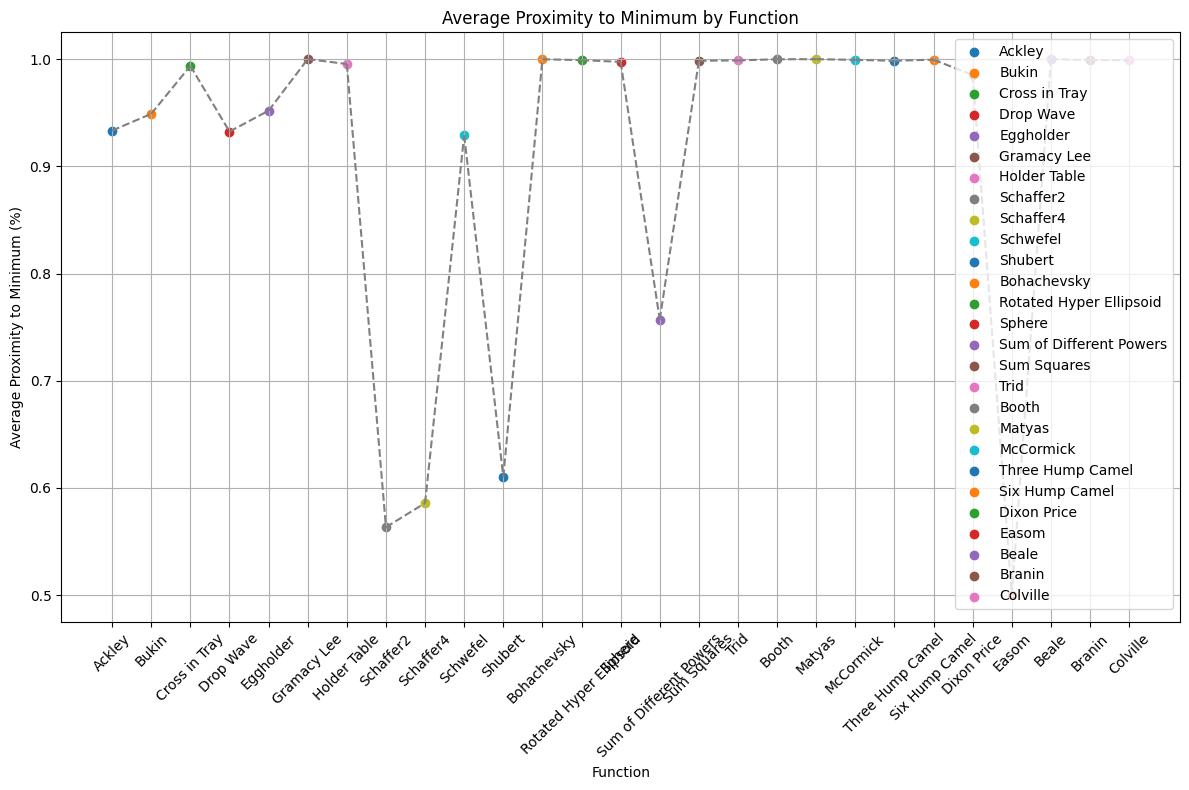

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Initial LHS, Candidate LHS
function_names = ex_func.function_ranges.keys()

# Her bir fonksiyon için işlemleri gerçekleştir
number_of_repeats = 1

average_proximities = {
    "Function": [],
    "Average Proximity to Minimum (%)": []
}

for function_name in function_names:
    if True:
    
        proximity_to_minimum_count = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    print(f"Working on function: {function_name}")

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]


                    # Generate initial samples
                    sampler = samplers.LatinHypercubeSampling(function_param)
                    initial_points = sampler.sample(num_samples=5, ranges=range_param)
                    initial_values = np.array([function_param(i) for i in initial_points])

                    # Train the initial model using random forests
                    rf_model = models.RandomForestModel(n_estimators=200, random_state=1729)
                    rf_model.train_model(initial_points, initial_values)
                    trained_rf_model = rf_model.get_model()

                    # Perform active learning
                    active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
                    min_function_values, improvement, new_points_all, iteration = active_learning.run_active_learning_constant_iterations_50(2000, range_param, 3)
                    iteration_count += iteration
                    minimum_value_so_far = min(min_function_values)
                    
                    current_proximity =  minimum_value_so_far 
                    proximity_to_minimum_count += current_proximity
                    #print(proximity_to_minimum_count)

                    

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")
                
                    
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

               
        if True:
            average_iterations = iteration_count/number_of_repeats
            current_average_func = ex_func.function_averages[function_name][0]
            current_minimum_func = ex_func.function_mins[function_name][0]
            average_proximity_to_minimum = proximity_to_minimum_count/number_of_repeats
            

            average_proximity_to_minimum_by_percent = (2*(current_average_func-current_minimum_func)-(average_proximity_to_minimum-current_minimum_func))/(2*(current_average_func-current_minimum_func))
            average_proximities["Function"].append(function_name)
            average_proximities["Average Proximity to Minimum (%)"].append(average_proximity_to_minimum_by_percent)
            #print(average_iterations)
            print(average_proximity_to_minimum_by_percent)

            print("******")
            print("******")
            

# Convert the dictionary to a DataFrame
average_proximities_df = pd.DataFrame(average_proximities)

# Plotting
plt.figure(figsize=(12, 8))
for i, (function, proximity) in enumerate(zip(average_proximities_df["Function"], average_proximities_df["Average Proximity to Minimum (%)"])):
    plt.scatter(i, proximity, label=function)

# Connect points with lines
for i in range(len(average_proximities_df["Function"]) - 1):
    plt.plot([i, i + 1], [average_proximities_df["Average Proximity to Minimum (%)"][i], average_proximities_df["Average Proximity to Minimum (%)"][i + 1]], color='gray', linestyle='--')

# Add labels and legend
plt.xlabel("Function")
plt.ylabel("Average Proximity to Minimum (%)")
plt.title("Average Proximity to Minimum by Function")
plt.xticks(range(len(average_proximities_df["Function"])), average_proximities_df["Function"], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


Working on function: Ackley
0.919450580811164
******
******
Working on function: Bukin
0.9319613372927231
******
******
Working on function: Cross in Tray
0.9556925154660283
******
******
Working on function: Drop Wave
0.5527397184216661
******
******
Working on function: Eggholder
0.8856620192523645
******
******
Working on function: Gramacy Lee
0.9689363879820502
******
******
Working on function: Holder Table
0.9903714030029394
******
******
Working on function: Schaffer2
0.7108849370621262
******
******
Working on function: Schaffer4
0.6621663792885617
******
******
Working on function: Schwefel
0.9479558446374186
******
******
Working on function: Shubert
0.8442930831356933
******
******
Working on function: Bohachevsky
0.9676898884676521
******
******
Working on function: Rotated Hyper Ellipsoid
0.9932022722050634
******
******
Working on function: Sphere
0.9979250028874947
******
******
Working on function: Sum of Different Powers
0.9331496672791487
******
******
Working on func

c:\Users\kutay\OneDrive\Masaüstü\492 taşoda 2\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\utils\models.py:408: RuntimeWarning: invalid value encountered in divide
  uncertainty_scores = 1 - variance / np.max(variance)
c:\Users\kutay\OneDrive\Masaüstü\492 taşoda 2\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\utils\models.py:416: RuntimeWarning: invalid value encountered in divide
  predicted_score = (predicted_values - min_predicted_value) / (max_predicted_value - min_predicted_value)
c:\Users\kutay\OneDrive\Masaüstü\492 taşoda 2\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\utils\models.py:408: RuntimeWarning: invalid value encountered in divide
  uncertainty_scores = 1 - variance / np.max(variance)
c:\Users\kutay\OneDrive\Masaüstü\492 taşod

0.49997624208154906
******
******
Working on function: Beale
0.9999007097591703
******
******
Working on function: Branin
0.9980257291179965
******
******
Working on function: Colville
0.9685643265140037
******
******


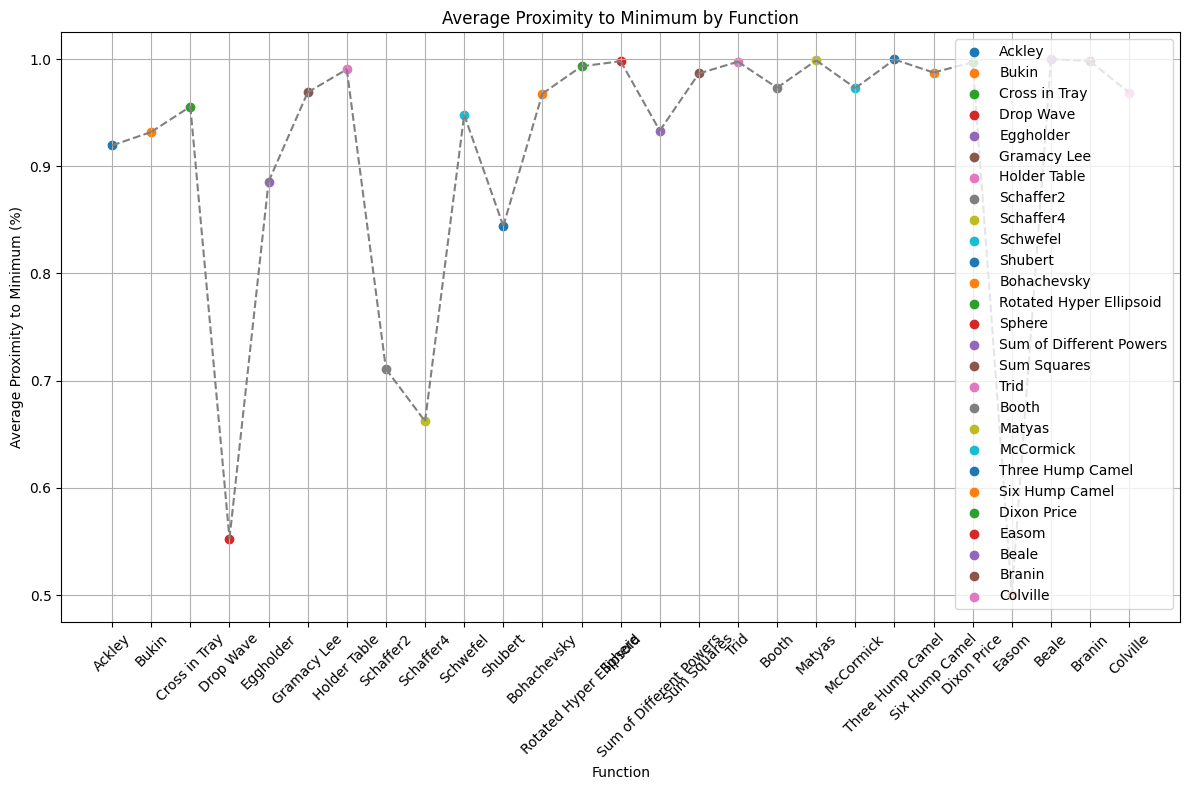

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Initial LHS, Candidate LHS
function_names = ex_func.function_ranges.keys()

# Her bir fonksiyon için işlemleri gerçekleştir
number_of_repeats = 1

average_proximities = {
    "Function": [],
    "Average Proximity to Minimum (%)": []
}

for function_name in function_names:
    if True:
    
        proximity_to_minimum_count = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    print(f"Working on function: {function_name}")

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]


                    # Generate initial samples
                    sampler = samplers.LatinHypercubeSampling(function_param)
                    initial_points = sampler.sample(num_samples=5, ranges=range_param)
                    initial_values = np.array([function_param(i) for i in initial_points])

                    # Train the initial model using random forests
                    rf_model = models.RandomForestModel(n_estimators=200, random_state=1729)
                    rf_model.train_model(initial_points, initial_values)
                    trained_rf_model = rf_model.get_model()

                    # Perform active learning
                    active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
                    min_function_values, improvement, new_points_all, iteration = active_learning.run_active_learning_constant_iterations_25(2000, range_param, 3)
                    iteration_count += iteration
                    minimum_value_so_far = min(min_function_values)
                    
                    current_proximity =  minimum_value_so_far 
                    proximity_to_minimum_count += current_proximity
                    #print(proximity_to_minimum_count)

                    

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")
                
                    
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

               
        if True:
            average_iterations = iteration_count/number_of_repeats
            current_average_func = ex_func.function_averages[function_name][0]
            current_minimum_func = ex_func.function_mins[function_name][0]
            average_proximity_to_minimum = proximity_to_minimum_count/number_of_repeats
            

            average_proximity_to_minimum_by_percent = (2*(current_average_func-current_minimum_func)-(average_proximity_to_minimum-current_minimum_func))/(2*(current_average_func-current_minimum_func))
            average_proximities["Function"].append(function_name)
            average_proximities["Average Proximity to Minimum (%)"].append(average_proximity_to_minimum_by_percent)
            #print(average_iterations)
            print(average_proximity_to_minimum_by_percent)

            print("******")
            print("******")
            

# Convert the dictionary to a DataFrame
average_proximities_df = pd.DataFrame(average_proximities)

# Plotting
plt.figure(figsize=(12, 8))
for i, (function, proximity) in enumerate(zip(average_proximities_df["Function"], average_proximities_df["Average Proximity to Minimum (%)"])):
    plt.scatter(i, proximity, label=function)

# Connect points with lines
for i in range(len(average_proximities_df["Function"]) - 1):
    plt.plot([i, i + 1], [average_proximities_df["Average Proximity to Minimum (%)"][i], average_proximities_df["Average Proximity to Minimum (%)"][i + 1]], color='gray', linestyle='--')

# Add labels and legend
plt.xlabel("Function")
plt.ylabel("Average Proximity to Minimum (%)")
plt.title("Average Proximity to Minimum by Function")
plt.xticks(range(len(average_proximities_df["Function"])), average_proximities_df["Function"], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


In [20]:
# Initial LHS, Candidate LHS
function_names = ex_func.function_ranges.keys()

# Her bir fonksiyon için işlemleri gerçekleştir
number_of_repeats = 1

for function_name in function_names:
    if True:
    
        proximity_to_minimum_count = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    print(f"Working on function: {function_name}")

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]


                    # Generate initial samples
                    sampler = samplers.LatinHypercubeSampling(function_param)
                    initial_points = sampler.sample(num_samples=5, ranges=range_param)
                    initial_values = np.array([function_param(i) for i in initial_points])

                    # Train the initial model using random forests
                    rf_model = models.RandomForestModel(n_estimators=200, random_state=1729)
                    rf_model.train_model(initial_points, initial_values)
                    trained_rf_model = rf_model.get_model()

                    # Perform active learning
                    active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
                    min_function_values, improvement, new_points_all, iteration = active_learning.run_active_learning_constant_iterations(2000, range_param, 3)
                    iteration_count += iteration
                    minimum_value_so_far = min(min_function_values)
                    print('liste',min_function_values)
                    print('min_so_far',minimum_value_so_far)
                    current_proximity =  minimum_value_so_far 
                    proximity_to_minimum_count += current_proximity
                    #print(proximity_to_minimum_count)

                    

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")
                
                    
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

                print("******")
                print("******")
                print("******")
                print("******")
        if True:
            average_iterations = iteration_count/number_of_repeats
            current_average_func = ex_func.function_averages[function_name][0]
            print('ave',current_average_func)
            current_minimum_func = ex_func.function_mins[function_name][0]
            print('min',current_minimum_func)
            average_proximity_to_minimum = proximity_to_minimum_count/number_of_repeats
            print(current_average_func-current_minimum_func)
            print(average_proximity_to_minimum - current_minimum_func)

            average_proximity_to_minimum_by_percent = (2*(current_average_func-current_minimum_func)-(average_proximity_to_minimum-current_minimum_func))/(2*(current_average_func-current_minimum_func))
            #print(average_iterations)
            print(average_proximity_to_minimum_by_percent)
    


Working on function: Ackley
liste [19.136412406379442, 19.136412406379442, 19.136412406379442, 19.136412406379442, 19.136412406379442, 19.136412406379442, 19.136412406379442, 19.136412406379442, 19.136412406379442, 19.136412406379442, 19.136412406379442, 19.136412406379442, 11.018593099931799, 11.018593099931799, 11.018593099931799, 11.018593099931799, 9.490127039865753, 9.490127039865753, 9.490127039865753, 9.490127039865753, 9.490127039865753, 9.490127039865753, 9.490127039865753, 4.5810928930122685, 4.5810928930122685, 4.5810928930122685, 4.5810928930122685, 4.5810928930122685, 4.5810928930122685, 4.5810928930122685, 4.5810928930122685, 4.389014654023022, 4.389014654023022, 4.389014654023022, 4.389014654023022, 4.389014654023022, 4.389014654023022, 4.389014654023022, 4.389014654023022, 4.389014654023022, 4.389014654023022, 3.2442361048367907, 3.2442361048367907, 3.2442361048367907, 3.2442361048367907, 3.2442361048367907, 3.2442361048367907, 3.2442361048367907, 3.2442361048367907, 3.

c:\Users\kutay\OneDrive\Masaüstü\492 taşoda 2\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\utils\models.py:200: RuntimeWarning: invalid value encountered in divide
  predicted_score = (predicted_values - min_predicted_value) / (max_predicted_value - min_predicted_value)
c:\Users\kutay\OneDrive\Masaüstü\492 taşoda 2\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\utils\models.py:200: RuntimeWarning: invalid value encountered in divide
  predicted_score = (predicted_values - min_predicted_value) / (max_predicted_value - min_predicted_value)
c:\Users\kutay\OneDrive\Masaüstü\492 taşoda 2\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\Benchmarking_Constant_Number_of_Iterations_and_All_2D_Functions\utils\models.py:200: RuntimeWarning: invalid value encountered in divide
  predicted_score = (predicted_values - min_p

liste [-2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079686602561e-97, -2.111079